<a href="https://colab.research.google.com/github/jppgks/DL-from-Scratch-with-PyTorch/blob/main/Classifying_FashionMNIST_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
from torch.nn import functional as F

## Data

In [2]:
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
img, label = training_data[0]
img.shape

torch.Size([1, 28, 28])

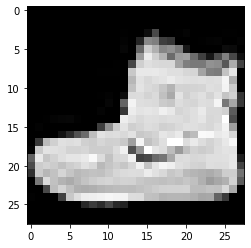

In [4]:
import matplotlib.pyplot as plt
plt.imshow(img.squeeze(0), cmap='gray')

## Model

In [5]:
img.shape

torch.Size([1, 28, 28])

In [6]:
class ImageClassifier(nn.Module):
  out_channels: int = 32
  kernel_size: int = 3
  stride: int = 1
  padding: int = 1


  def __init__(self, in_channels, input_size, num_classes):
    super(ImageClassifier, self).__init__()
    self.conv1 = nn.Conv2d(in_channels, self.out_channels, self.kernel_size, self.stride, self.padding)
    
    self.activation = nn.ReLU()

    self.pool = nn.MaxPool2d(2, 2)

    self.flatten = nn.Flatten(1, -1)
    self.out = nn.Linear(self.out_channels * (input_size // 2) * (input_size // 2), 10)

  def forward(self, inputs):
    x = inputs
    x = self.conv1(x)
    x = self.activation(x)
    x = self.pool(x)
    out = self.out(self.flatten(x))

    return out

In [7]:
model = ImageClassifier(in_channels=1, input_size=28, num_classes=10)

In [8]:
F.softmax(model(img.unsqueeze(0)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


tensor([[0.1085, 0.0916, 0.1048, 0.0784, 0.1190, 0.0742, 0.1031, 0.1315, 0.1007,
         0.0882]], grad_fn=<SoftmaxBackward0>)

## Train

### Loss

In [ ]:
loss = nn.CrossEntropyLoss()

In [ ]:
pred = model(img.unsqueeze(0))

In [ ]:
pred.shape

torch.Size([1, 10])

In [ ]:
loss(pred, torch.tensor([label]))

tensor(2.0843, grad_fn=<NllLossBackward0>)

Cross entropy should equal the negative log likelihood (NLL) between predicted probabilities $p$ and target $y$. The predicted probabilies $p$ are obtained by applying log-softmax on the values predicted by the model. One-hot encoding the label gives a probability vector with all zeros except a 1 on the index of the label $y$. The NLL is reduced to a single term $-p_y*y$, with $y=1$ and $p_y=$ the log-softmax of the value predicted by the model for this label.

In [ ]:
-F.log_softmax(pred, dim=1).squeeze()[label]

tensor(2.0843, grad_fn=<NegBackward0>)

Log softmax is simply the log of the softmax:

In [ ]:
-torch.log(
    torch.exp(pred.squeeze()[label]) / torch.sum(torch.exp(pred))
)

tensor(2.0843, grad_fn=<NegBackward0>)

### Optimization

In [ ]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [ ]:
train_dataloader = torch.utils.data.DataLoader(training_data, batch_size)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size)

In [ ]:
if torch.cuda.is_available():
  device = 'cuda'
else:
  device = 'cpu'

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Does it learn? 🤔

In [ ]:
from utils import train_loop, test_loop

ModuleNotFoundError: ignored

In [ ]:
model = model.to(device)

In [ ]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss, optimizer, device)
    test_loop(test_dataloader, model, loss, device)
print("Done!")

It does! 🥳

## Inference

In [ ]:
imgs, labels = next(iter(test_dataloader))
imgs, labels = imgs.to(device), labels.to(device)

In [ ]:
labels_pred = model(imgs)

In [ ]:
labels

In [ ]:
labels_pred.argmax(1)